# Исследование объявлений о продаже квартир

Цель данного исследования - провести анализ данных сервиса Яндекс.Недвижимость (архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет) и найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Исследование будет состоять из обзора данных, их предобработки и самого анализа данных.

### Обзор данных.

In [1]:
#загружаем данные из файла в датафрейм
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv('real_estate_data.csv',sep='\t')

In [3]:
#смотрим общую информацию по файлу
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:

pd.set_option('display.max_columns', 50)
df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Данный файл содержит в себе информацию об объявлениях о продаже квартир в Санкт-Петербурге и соседних населенных пунктах с сайта Яндекс Недвижимость.

Таблица состоит из 22 столбцов, которые содержат данные о параметрах квартир, такие как: общая площадь, жилая площадь, площадь кухни, этаж, расположение и др. Количество объектов - 23699 шт.

Данные представлены с 2014 г. по 2019 г.

### Предобработка данных

In [5]:
#определяем количество пропусков в каждом столбце
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#заменяем пропуски в общей этажности-медианным значением
df['floors_total'].unique()
median_floors_total = df['floors_total'].median()
df['floors_total']=df['floors_total'].fillna(median_floors_total)



In [7]:
#формируем группы по разной этажности и заменяем пропуски с данными о высоте потолков средним значением каждой группы
for i in df['floors_total'].unique():
    df.loc[(df['floors_total']==i)&(df['ceiling_height'].isna()), 'ceiling_height']\
    =df.loc[(df['floors_total']==i),'ceiling_height'].mean()
#удаляем один оставшийся пропуск
df=df.dropna(subset=['ceiling_height'])

In [8]:
#заменяем пропуски в группе "балконы" на 0
df['balcony'] = df['balcony'].fillna('0') 

<ipython-input-8-b23754e90477>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balcony'] = df['balcony'].fillna('0')


In [9]:
#заменяем пропуски в группе "is_apartment" на False
print(df['is_apartment'].unique())
df['is_apartment']=df['is_apartment'].fillna(False)

[nan False True]


<ipython-input-9-f8408ac4485b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_apartment']=df['is_apartment'].fillna(False)


In [10]:
#заменяем пропуски в жилой площади и площади кухни, исходя из среднего коэффициента отношения жилой площади и площади всей квартиры
coefficient_living_area=(df['living_area']/df['total_area']).mean()
df.loc[(df['living_area']).isna(),'living_area']=df.loc[(df['living_area'].isna()),'total_area']*coefficient_living_area
coefficient_kitchen_area=(df['kitchen_area']/df['total_area']).mean()
df.loc[(df['kitchen_area']).isna(),'kitchen_area']=df.loc[(df['kitchen_area'].isna()),'total_area']*coefficient_kitchen_area                   

In [11]:
#заменяем пропуски в других количественных переменных медианным значением.
#airports_nearest
median_airports_nearest = df['airports_nearest'].median()
df['airports_nearest']=df['airports_nearest'].fillna(median_airports_nearest)
#cityCenters_nearest
median_cityCenters_nearest = df['cityCenters_nearest'].median()
df['cityCenters_nearest']=df['cityCenters_nearest'].fillna(median_cityCenters_nearest)
#parks_around3000
df['parks_around3000']=df['parks_around3000'].fillna(0)
#ponds_around3000         
df['ponds_around3000']=df['ponds_around3000'].fillna(0)




In [12]:
#проверяем, остались ли еще пропуски
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest           15619
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

В данном фатафрейме представлены как количественные, так и качественные переменные. 
Количественные переменные в некоторых случаях мы можем заменить средним и медианным значением. Что мы и сделали с следующих столбцах:
- в столбце "всего этажей в доме" пропуски заменили медианным значением,
- в столбце "высота потолков" заменили средним значением высоты потолков в домах разной этажности,
- в столбцах "жилая площадь" и "площадь кухни" мы заменили пропуски с помощью коэффициэнта отношения общей площади к жилой и площади кухни.

Большое количество пропусков в столбце "балконы" связано вероятно с тем, что при отсутствии в доме балкона размещающий обьявление не оставлял информацию в нужном окне. Поэтому данные пропуски мы заменили на 0. 
Похожая ситуация с пропусками в столбце "is_apartment". Скорее всего заполняющий просто не стал указывать, что квартира не является аппартаментами, поэтому все пропуски мы заменили на False.

Пропуски в расстояниях до ближайшего аэропорта и центра города мы заменили медианным значением по каждой группе.  Пропуски в столбцах "число водоемов в радиусе 3 км" и "число парков в радиусе 3 км" заменили на 0. Информацию о расстоянии до ближайшего водоема и парка оставили без изменений.

Пропуски в названии населенного пункта являются пропусками качественных переменных. Их нельзя заменить, не теряя смысла данных. Они занимают небольшую часть- 0,2% всех данных. При необходимости в дальнейшем их можно удалить.
Пропуски в столбце "количество дней экспозиции" связано, видимо, с тем, что на момент получения данных, эти объявления были актуальными.Их количество-13%. Заменить их, не потеряв смысла, не видится возможным. Если они будут искажать анализ в дальнейшем, их также нужно будет удалить.

In [13]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'] = df['first_day_exposition'].dt.floor('1D')
df['balcony']=df['balcony'].astype('int')
df['floors_total']=df['floors_total'].astype('int')
df['parks_around3000']=df['parks_around3000'].astype('int')
df['ponds_around3000']=df['ponds_around3000'].astype('int')

В столбце "день размещения объявления" переведем данные в специальный datetime-формат, чтобы в дальнейшем можно было преобразовывать данные под задачи анализа. Округлим данные до дня, так как время размещения объявления в рамках данного анализа не важно.

Изменим вещественный тип данных на целочисленный в столбцах "балконы","количество этажей в здании", "парки рядом" и "водоемы рядом". Так как эти данные - целые значения.

In [14]:
#изучаем уникальные значения в столбце 'названия населенных пунктов'
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [15]:
#заменяем неявные дубликаты
df['locality_name']=df['locality_name'].replace('городской посёлок','посёлок',regex=True)
df['locality_name']=df['locality_name'].replace('посёлок городского типа','посёлок',regex=True)
df['locality_name']=df['locality_name'].replace('поселок городского типа','посёлок',regex=True)
df['locality_name']=df['locality_name'].replace('поселок','посёлок',regex=True)


In [16]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [17]:
#изучим уникальные значения в каждом столбце и определим аномальные значения
for i in df.columns:
    print(i, ' : ', df[i].sort_values().unique())


total_images  :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 35 37 39 42 50]
last_price  :  [1.219e+04 4.300e+05 4.400e+05 ... 4.013e+08 4.200e+08 7.630e+08]
total_area  :  [ 12.   13.   13.2 ... 631.  631.2 900. ]
first_day_exposition  :  ['2014-11-27T00:00:00.000000000' '2014-11-29T00:00:00.000000000'
 '2014-12-04T00:00:00.000000000' ... '2019-05-01T00:00:00.000000000'
 '2019-05-02T00:00:00.000000000' '2019-05-03T00:00:00.000000000']
rooms  :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]
ceiling_height  :  [  1.           1.2          1.75         2.           2.2
   2.25         2.3          2.34         2.4          2.45
   2.46         2.47         2.48         2.49         2.5
   2.51         2.52         2.53         2.54         2.55
   2.56         2.57         2.58         2.59         2.59444444
   2.59971941   2.6          2.61         2.62         2.63
   2.64         2.64025791   2.65         2.66         2.

In [18]:
print(df['total_images'].count())
print(df['total_images'].loc[(df['ceiling_height']>2)&(df['ceiling_height']<10)].count())
print(df['total_images'].loc[(df['last_price']>100000)].count())

23698
23658
23697


Данные о квартирах с высотой потолков ниже 2 м. и выще 10 м. кажутся неправдоподобными. 
Также как и квартиры с ценой ниже 100.000 рублей. Их процент от всех данных составляет 0,17% и 0,004% 
соответственно. Поэтому мы можем их удалить. 

Остальные значения являются правдоподобными, но содержат в себе редкие значения. В дальнейшем, если будет необходимо для анализа, редкие значения мы удалим.

In [19]:
#удалим неправдоподобные значения из данных
df=df.loc[(df['ceiling_height']>2)&(df['ceiling_height']<10)]
df=df.loc[(df['last_price']>100000)]

### Анализ данных

In [20]:
#добавим в таблицу следующие столбцы
#цена одного квадратного метра
df['price_for_metre']=df['last_price']/df['total_area']
#день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
df['weekday']=df['first_day_exposition'].dt.weekday
# месяц публикации объявления
df['month']=pd.DatetimeIndex(df['first_day_exposition']).month
#год публикации объявления
df['year']=pd.DatetimeIndex(df['first_day_exposition']).year
#тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type(row):
    if row['floor'] ==1:
        return 'Первый'
    if row['floor']==row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
df['floor_type']=df.apply(floor_type,axis=1)
#расстояние в км до центра города
df['cityCenters_km']=round(df['cityCenters_nearest']/1000,0)



In [21]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metre,weekday,month,year,floor_type,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.00000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,Другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.782385,11,18.60000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,Первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.793191,5,34.30000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,Другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.731545,14,89.79801,9,False,False,False,29.789251,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,Другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.00000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,Другой,8.0


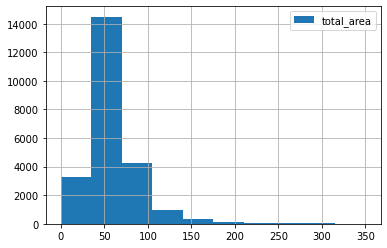

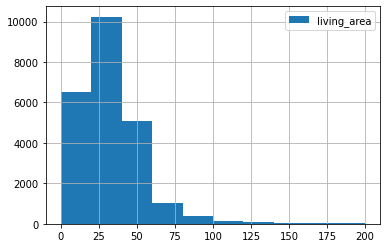

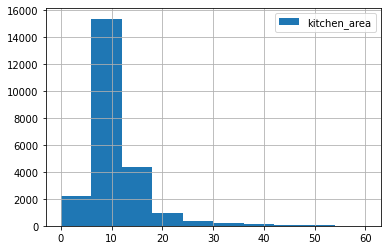

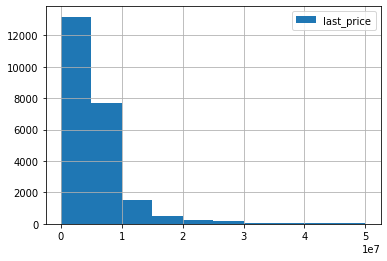

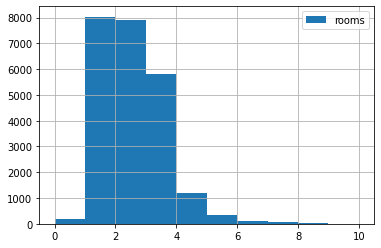

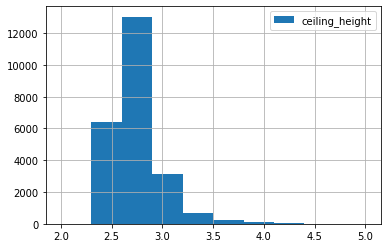

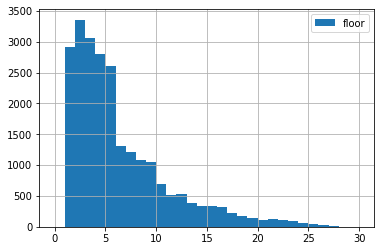

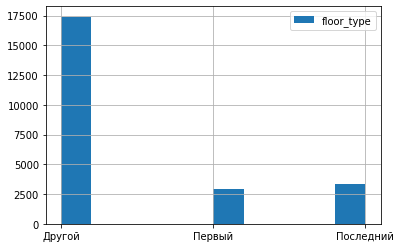

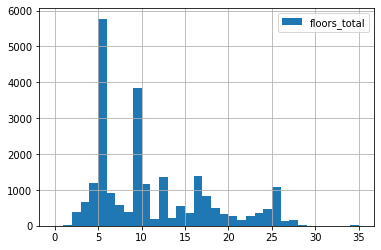

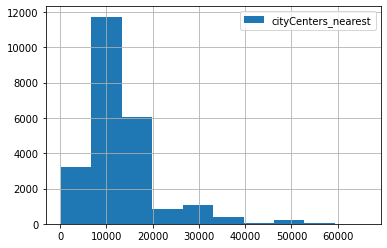

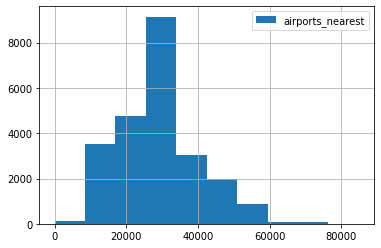

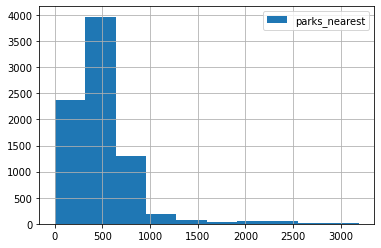

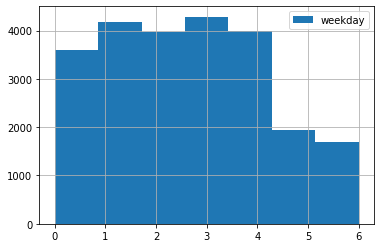

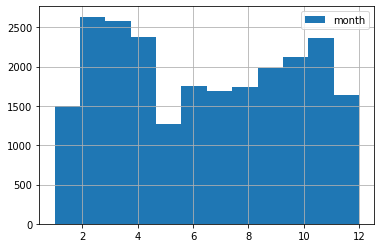

In [22]:
#построим гистограммы для дальнейшего изучения данных
df['total_area'].hist(range=(0,350),legend=True)
plt.show()
df['living_area'].hist(range=(0,200),legend=True)
plt.show()
df['kitchen_area'].hist(range=(0,60),legend=True)
plt.show()
df['last_price'].hist(range=(0,50000000),legend=True)
plt.show()
df['rooms'].hist(range=(0,10),legend=True)
plt.show()
df['ceiling_height'].hist(range=(2,5),legend=True)
plt.show()
df['floor'].hist(range=(0,30),bins=30,legend=True)
plt.show()
df['floor_type'].hist(legend=True)
plt.show()
df['floors_total'].hist(range=(0,35),bins=35,legend=True)
plt.show()
df['cityCenters_nearest'].hist(legend=True)
plt.show()
df['airports_nearest' ].hist(legend=True)
plt.show()
df['parks_nearest' ].hist(legend=True)
plt.show()
df['weekday'].hist(legend=True,range=(0,6),bins=7)
plt.show()
df['month'].hist(legend=True,range=(1,12),bins=12)
plt.show()



Из представленных графиков можно сделать следующие **выводы**.
- Общая площадь большинства продаваемых квартир меньше 100 квадратных метров. Более половины квартир  имели площадь около 50 
кв.м. Также встречались редкие квартиры площадью от 200 до 300 м. Жилая площадь большинства квартир от 20 до 40 кв.м. Площадь 
кухонь-от 6 до 12 кв.м. Количество квартир с площадью кухни 18 метров и более встречается намного реже. 

- Большинство квартир в Санкт-Петербурге и окрестностях продавлись менее чем за 10 млн.рублей. При этом примерно половина всех квартир стоила менее 5 млн.рублей. 

- В основном продавлись одно- и двухкомнатные квартиры. Чуть меньше было квартир с тремя комнатами. Квартиры с более 6 комнатными редко встречаются в данных. 

- Высота потолков большинства квартир колеблется от 2,5 до 3 метров. Некоторые редкие квартиры имели высоту потолков выше 3,2 метров. 

- Больше всего продаваемых квартир размещалось с 1 по 6 этаж. Чуть более 10% квартир размещалось на первом этаже и чуть более 10%- на последнем.Наиболее встречаемая высота домов-6 и 9 этажей. Но продавались квартиры и из 35-этажного дома.

- Расстояние большинства домов до центра-около 10 км,до аэропорта-около 30 км, до парка-0,5 км.

- В будние дни объявления размещались примерно одинаково часто (в понедельник-немного реже) и значительно реже в 
выходные дни. Наименьшее количество объявлений о продаже квартир приходится на май,декабрь и январь. Наибольшее - на февраль,март, апрель, ноябрь.


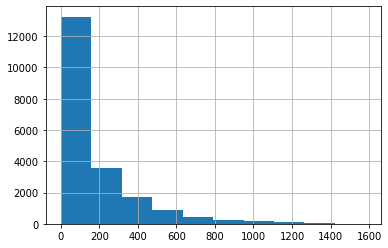

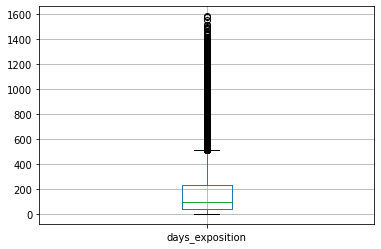

In [23]:
#изучим, как быстро продавались квартиры
df['days_exposition'].hist()
plt.show()
df.boxplot(column='days_exposition')

In [24]:
df['days_exposition'].describe()

count    20485.000000
mean       180.985502
std        219.826431
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем продажа квартиры занимала около 180 дней. При этом половина всех представленных квартир 
была продана менее чем за 95 дней (или снята с продажи по другим обстоятельствам). 

Продажа квартиры менее чем за 45 дней может 
считаться быстрой, а более чем за 232 дня-долгой. Наименьший промежуток, сколько времени была представлена квартира составляет 1 день,
наибольший-более 4 лет.

In [25]:
#изучим корреляцию между ценой и площадью квартиры
df_new=df[['total_area','living_area','kitchen_area','last_price']]
for i in df_new.columns:
    print(i, df[i].corr(df['last_price']))
    

    


total_area 0.6538194457103382
living_area 0.5857840615603489
kitchen_area 0.5169922229711071
last_price 0.9999999999999998


По всем характеристикам квартиры (общая площадь, жилая площадь, площадь кухни) мы получили значения корреляции находящиеся в промежутке от 0,5 до 0,7, что означает, что существует заметная связь между ценой и данными характеристиками квартиры.

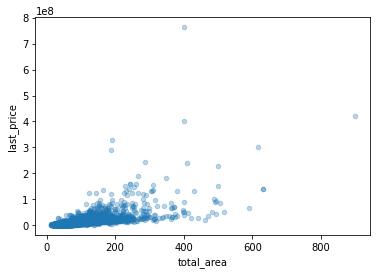

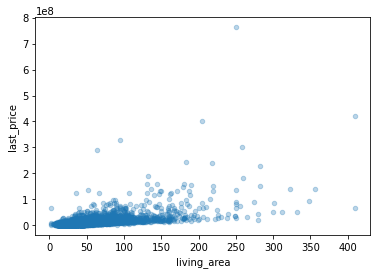

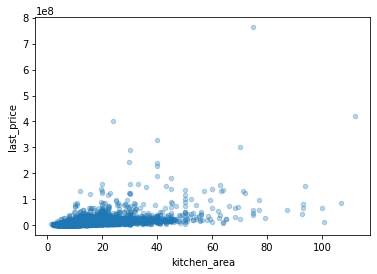

In [26]:
#'total_area'
df_new.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
 
None
#'living_area'
df_new.plot(x='living_area', y='last_price', kind='scatter',alpha=0.3)
None
#'kitchen_area'
df_new.plot(x='kitchen_area', y='last_price', kind='scatter',alpha=0.3)
None


На представленных выше графиках также видна взаимосвязь между ценой и общей площадью квартиры,
жилой площадью и площадью кухни. Корреляция прямая(положительная):с увеличением площади-увеличивается и цена квартиры

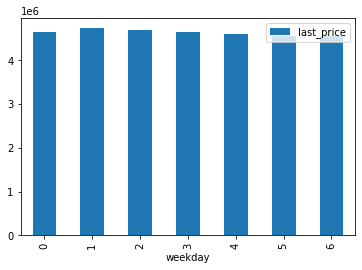

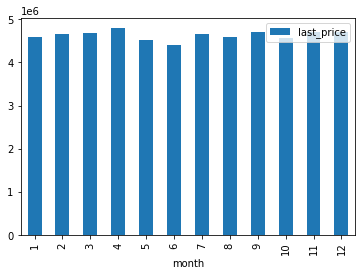

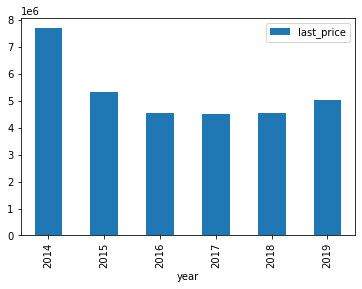

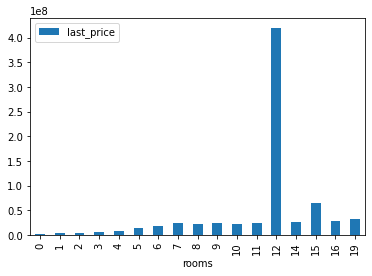

In [27]:
#weekday
pd.pivot_table(df,index='weekday',values='last_price',aggfunc='median').plot(kind='bar')
None
#month
pd.pivot_table(df,index='month',values='last_price',aggfunc='median').plot(kind='bar')
None
#year
pd.pivot_table(df,index='year',values='last_price',aggfunc='median').plot(kind='bar')
None
#rooms
pd.pivot_table(df,index='rooms',values='last_price',aggfunc='median').plot(kind='bar')
None

In [28]:
df.query('rooms==12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metre,weekday,month,year,floor_type,cityCenters_km
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,466666.666667,2,12,2017,Последний,8.0


Мы увидели пик стоимости квартир с 12 комнатами. Такая квартира в данных всего одна: площадью 900 кв.м. в Санкт-Петербурге на последнем этаже. Удалим это одно выбивающееся значение для лучшей интерпретации данных и заново построим график.

In [29]:
df=df.loc[(df['rooms']!=12)]

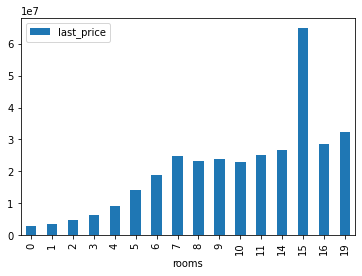

In [30]:
#rooms
pd.pivot_table(df,index='rooms',values='last_price',aggfunc='median').plot(kind='bar')
None

In [31]:
df['total_images'].loc[(df['rooms']>=7)].count()/df['total_images'].count()*100

0.37622590463307404

На представленных выше графиках мы видим:

- отсутствие взаимосвязи между ценой квартиры и днем и месяцем подачи объявления;
- что прослеживается связь между ценой и годом подачи объявления: в 2014 году медиана цен всех проданных квартир значительно выше, чем в последующих годах;
- что существует взаимосвязь между ценой и количеством комнат. По мере увеличения комнат увеличивается и цена. 

In [32]:
#посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
max_count=pd.pivot_table(df,index='locality_name',values='price_for_metre',aggfunc=['count','mean'])
max_count.columns=['count','mean']
max_count.sort_values(by='count',ascending=False).head(10)



,count,mean
locality_name,,
Санкт-Петербург,15698,114815.362308
посёлок Мурино,554,85656.214377
посёлок Шушары,440,78677.364217
Всеволожск,397,68719.320400
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,306,68757.678644
деревня Кудрово,299,92473.547576


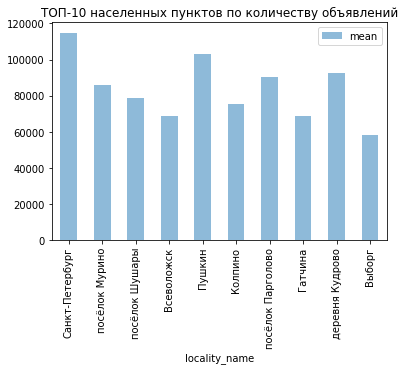

In [33]:
max_count.sort_values(by='count',ascending=False).head(10).plot(kind='bar',y='mean',alpha=0.5,
title='ТОП-10 населенных пунктов по количеству объявлений')
None

In [34]:
#найдем населённые пункты с самой высокой и низкой стоимостью квадратного метра.
avg_price=pd.pivot_table(df,index='locality_name',values='price_for_metre',aggfunc='mean')
print('Самая высокая средняя стоимость метра в населенном пункте:',avg_price.sort_values(by='price_for_metre', ascending=False).head(1))
print('Самая низкая средняя стоимость метра в населенном пункте:',avg_price.sort_values(by='price_for_metre').head(1))

Самая высокая средняя стоимость метра в населенном пункте:                price_for_metre
locality_name                 
Зеленогорск      115122.799198
Самая низкая средняя стоимость метра в населенном пункте:                     price_for_metre
locality_name                      
деревня Старополье     11206.221198


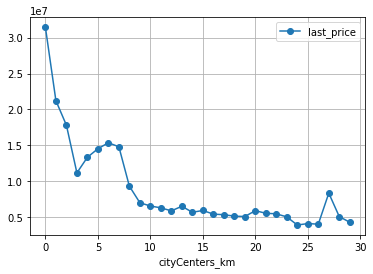

In [35]:
#выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра до центра города

data_spb=df.query('locality_name == "Санкт-Петербург"')
pd.pivot_table(data_spb,index='cityCenters_km',values='last_price',aggfunc='mean').plot(style='o-',grid=True)


Мы видим, что цена квартиры зависит от того, насколько близко она расположена к центру города. Если недвижимость расположена
менее,чем в 10 км. от центра города ее стоимость намного больше, чем стоимость более дальних квартир. После 10 км. влияние 
расстояния на цену значительно снижается. 

Отметим, что зависимость цены от расстояния в первые 10 км. не линейна: сначала 
стоимость снижается, вместе с увеличением расстояния, потом на расстоянии 6 км. от центра мы видим скачок цены, потом стоимость
снова уменьшается.

### Общий вывод

В ходе данного исследования мы проанализировали архив объявлений с сайта Яндекс Недвижимость, собранный с 2014 г. по 2019 г. Данный архив содержал информацию о чуть менее чем 24000 объявлений о продаже квартир, находящихся в Санкт_петербурге и его окрестностях. Объявления содержали  данные о самой квартире (ее площадь, количество комнат, наличие балкона и др.), информацию о местоположении ( наименование населенного пункта, удаленность от центра, аэропорта, парков) и данные о дате и времени размещения документов.

Целью нашего исследования было осуществить предобработку данных, а также найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

В ходе предобработки данных мы заменили часть пропусков на медианные или логически обусловленные значения (столбцы:'ceiling_height','floors_total','living_area','is_apartment','kitchen_area', 'balcony' ,'parks_around3000', 'ponds_around3000', 'airports_nearest','cityCenters_nearest') или оставили без изменений ('locality_name', 'parks_nearest', 'ponds_nearest', 'days_exposition'). Также были изменены неявные дубликаты в наименованиях населенных пунктов и изменен тип даты для последующего анализа. Неправдоподобных значений в данных было немного (0,17%) и мы смогли их удалить.

Были выявлены следующие **особенности рынка недвижимости** Санкт-Петербурга и окрестностей:
- большинство продаваемых квартир имели жилую площадь от 20 до 40 кв.м., площадь кухни- от 6 до 12 кв.м., располагались с 1 до 6 этажа;
- большая часть квартир в Санкт-Петербурге и окрестностях в то время стоили меньше 10 млн. рублей;
- расстояние большинства домов до центра - около 10 км, до аэропорта-около 30 км, до парка-0,5 км;
- оживление на рынке недвижимости происходит в феврале, марте,апреле и ноябре;
- среднее время размещения объявления на сайте (а значит и продажи квартиры) составляло 180 дней. Но половина квартир продавалась менее чем за 95 дней;
- наиболее высокой цена квартир была в 2014 г. Потом в 2015 г. и 2016 г. происходило снижение цен. До 2018 г. рынок был стабилен, а в 2019г. был отмечен его рост.

В ходе анализа мы обнаружили **заметную связь** между ценой квартиры и общей площадью недвижимости, жилой площадью и площадью кухни. Также существует связь между ценой квартиры и количеством комнат.
Эта связь носит *прямой* характер: увеличивается площадь и количество комнат - увеличивается и стоимость. 

Зависимость между ценой и датой подачи (день,месяц) объявления не прослеживается.

Самая **высокая** средняя цена за квадратный метр была в Зеленогорске (115000 р.), самая **низкая** -в деревне Старополье(11000 рублей). Более половины квартир из архива продавались в Санкт-Петербурге.

Данное исследование дает общее представление о рынке недвижимости в данном регионе за 2014-2019 г.г. Полученные закономерности и взаимосвязи могут в дальнейшем быть использованы для предсказания ситуации на рунке недвижимости, могут помочь заметить аномалии и провести изменения на сайте для сокращения в будущем пропусков в данных, автоматизировать процессы.